In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.train.labels.shape

(55000, 10)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.test.labels.shape

(10000, 10)

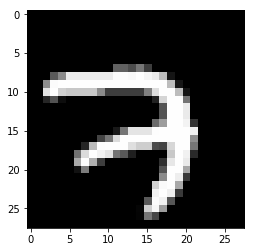

In [8]:
plt.imshow(Image.fromarray((mnist.train.images[0]*255).reshape([28,28])))

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [10]:
##获得批量样本的方法
batch_image,batch_labels = mnist.train.next_batch(32) #拿到32张图片

In [11]:
#定义神经网络模型
with tf.Graph().as_default() as g:
    #使用占位符表达输入输出
    inputs = tf.placeholder(shape=[None,784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10], dtype=tf.float32)
    
    #定义神经网络模型
    out_weight = tf.Variable(tf.random_normal([784,10]))  #权重矩阵
    out_bias = tf.Variable(tf.zeros([10,]))    #偏置值使用0来初始化
    
    logits = tf.matmul(inputs,out_weight)+out_bias #分类前的输出类似于几率
    out_put = tf.nn.softmax(logits)   #shape为【None,10】
    
    #交叉熵代价函数
    loss = tf.reduce_mean(
        -tf.reduce_sum(labels * tf.log(out_put + 1e-7),axis=1)) #批量样本的交叉熵
    #将正确率显示出来
    acc = tf.reduce_mean(tf.cast(
        tf.equal(tf.argmax(out_put,axis=1),tf.argmax(labels,axis=1)),
                tf.float32))
    
    #优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)

In [12]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(10000):
        batch_images,batch_labels = \
            mnist.train.next_batch(32)
        res_loss,_ = sess.run(
            [loss, train_op],
            feed_dict={
                inputs: batch_images,
                labels: batch_labels
            })
        if i % 500 == 0:
            accs = []
            for j in range(10000 // 32):
                batch_images,batch_labels = \
                    mnist.test.next_batch(32)
                res_acc = sess.run(acc,feed_dict={inputs:batch_images,labels: batch_labels})
                
                accs.append(res_acc)
            m_acc = np.mean(accs)
            
            print('loss %2.4f ,acc %2.2f%%' % (res_loss,m_acc * 100))
        

loss 11.6909 ,acc 6.74%
loss 5.9044 ,acc 26.05%
loss 4.8732 ,acc 42.94%
loss 2.2087 ,acc 52.42%
loss 2.8023 ,acc 58.87%
loss 1.9402 ,acc 63.71%
loss 0.8394 ,acc 67.06%
loss 2.0141 ,acc 69.77%
loss 1.5897 ,acc 71.76%
loss 1.0350 ,acc 73.81%
loss 2.0087 ,acc 75.06%
loss 1.5473 ,acc 76.24%
loss 1.0302 ,acc 77.48%
loss 1.4934 ,acc 78.48%
loss 0.7379 ,acc 79.22%
loss 1.2183 ,acc 79.66%
loss 1.5583 ,acc 80.32%
loss 0.8312 ,acc 80.73%
loss 0.9680 ,acc 81.12%
loss 1.6621 ,acc 81.47%
